|||
|---|---|
|Title|nwreadinglist|
|Author|numbworks|
|Version|3.3.0|
||Please check [docs/docs-nwreadinglist.md](../docs/docs-nwreadinglist.md) before proceeding.|

#### Setup

In [1]:
install_dependencies : bool = False

if install_dependencies:
    %pip install numpy==1.26.3
    %pip install pyarrow==15.0.0
    %pip install openpyxl==3.1.0
    %pip install pandas==2.2.0
    %pip install requests==2.31.0
    %pip install matplotlib==3.8.2
    %pip install coverage==7.2.3
    %pip install parameterized==0.9.0
    %pip install tabulate==0.9.0
    %pip install sparklines==0.4.2
    %pip install mypy==1.9.0
    %pip install -e 'git+https://github.com/numbworks/nwshared.git#egg=nwshared&subdirectory=src'


#### Global Modules

In [2]:
from pandas import DataFrame
from typing import Tuple

#### Local Modules

In [3]:
from nwshared import VersionChecker, PlotManager
from nwreadinglist import DefaultPathProvider, YearProvider, SettingBag, ComponentBag
from nwreadinglist import ReadingListManager, MarkdownProcessor

#### Python Version Check

In [4]:
status : str = VersionChecker().get_python_version_status(required = (3, 12, 1))
print(status)

The installed Python version is matching the expected one (installed: '3.12.1', expected: '3.12.1').


#### Functions : Temp

#### Settings

In [5]:
setting_bag : SettingBag = SettingBag(

    show_books_df = False,
    show_sas_by_month_df = True,
    show_sas_by_year_street_price_df = True,
    show_rolling_total_df = True,
    show_sas_by_topic_df = True,
    show_sas_by_publisher_df = True,
    show_sas_by_rating_df = True,
    show_reading_list_by_kbsize_df = True,
    show_yearly_trend_by_topic_df = True,
    show_books_by_year_box_plot = True,
    show_reading_list_by_kbsize_box_plot = True,
    show_readme_md = True,
    show_reading_list_by_month_md = False,
    show_reading_list_by_publisher_md = False,
    show_reading_list_by_rating_md = False,
    show_reading_list_by_topic_md = False,
    show_reading_list_topic_trend_md = False,
    show_reading_list_md = False,
    save_reading_list_by_month_md = False,
    save_reading_list_by_publisher_md = False,
    save_reading_list_by_rating_md = False,
    save_reading_list_by_topic_md = False,
    save_reading_list_topic_trend_md = False,
    save_reading_list_md = False,
    working_folder_path = "c:/Users/Rubèn/Desktop/",
    read_years = YearProvider().get_all_years(),
    excel_path = DefaultPathProvider().get_default_reading_list_path(),
    excel_books_nrows = 302
)


#### Main : Analysis

In [6]:
reading_list_manager : ReadingListManager = ReadingListManager(component_bag = ComponentBag(), setting_bag = setting_bag)
books_df : DataFrame = reading_list_manager.get_books_dataset()

if setting_bag.show_books_df:
    display(books_df.head(n = setting_bag.n_generic))


In [7]:
rolling_total_df : DataFrame = reading_list_manager.get_rolling_total(books_df = books_df)

if setting_bag.show_rolling_total_df:
    display(rolling_total_df.head(n = setting_bag.n_generic))


,Years,Books,Pages,TotalSpend,LastUpdate
0,9,301,82434,$8498.52,2024-07-24


In [8]:
sas_by_month_tpl : Tuple[DataFrame, DataFrame] = reading_list_manager.get_sas_by_month_tpl(books_df = books_df)

if setting_bag.show_sas_by_month_df:
    display(sas_by_month_tpl[1].head(n = setting_bag.n_by_month))


,Month,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
0,1,0 (0),↑,13 (5157),↓,0 (0),↑,4 (1061),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,3 (855)
1,2,0 (0),↑,1 (106),↓,0 (0),↑,13 (2991),↓,0 (0),↑,11 (1289),↓,0 (0),=,0 (0),↑,14 (5573)
2,3,0 (0),↑,16 (3816),↓,6 (600),↑,20 (3349),↓,0 (0),↑,2 (612),↓,0 (0),↑,1 (139),↓,0 (0)
3,4,0 (0),↑,8 (2539),↓,7 (1986),↓,0 (0),↑,9 (2226),↓,0 (0),=,0 (0),=,0 (0),=,0 (0)
4,5,1 (288),↑,13 (3527),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,2 (590)
5,6,8 (1734),↓,4 (788),↓,1 (24),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,8 (642),↓,4 (2572)
6,7,4 (1758),↓,3 (1140),=,3 (427),↓,2 (444),↓,0 (0),=,0 (0),=,0 (0),=,0 (0),↑,21 (6187)
7,8,2 (334),↓,1 (453),↓,0 (0),↑,2 (848),↓,0 (0),=,0 (0),=,0 (0),↑,4 (1170),,
8,9,4 (881),↓,3 (840),↓,0 (0),↑,1 (1259),↓,0 (0),=,0 (0),↑,1 (360),↑,9 (1969),,
9,10,2 (275),↓,0 (0),↑,6 (1201),↓,0 (0),↑,6 (1941),↓,0 (0),=,0 (0),=,0 (0),,


In [9]:
sas_by_year_street_price_df : DataFrame = reading_list_manager.get_sas_by_year_street_price(
    sas_by_month_tpl = sas_by_month_tpl, 
    books_df = books_df)

if setting_bag.show_sas_by_year_street_price_df:
    display(sas_by_year_street_price_df.head(n = setting_bag.n_generic))


,2016,↕,2017,↕,2018,↕,2019,↕,2020,↕,2021,↕,2022,↕,2023,↕,2024
0,43 (12322),↑,62 (18366),↓,48 (12646),↓,42 (9952),↓,23 (6602),↓,13 (1901),↓,1 (360),↑,25 (4508),↑,44 (15777)
1,$1447.14,↑,$2093.14,↓,$1249.15,↓,$748.70,↓,$538.75,↓,$169.92,↓,$49.99,↑,$594.80,↑,$1606.93


In [10]:
sas_by_topic_df : DataFrame = reading_list_manager.get_sas_by_topic(books_df = books_df)

if setting_bag.show_sas_by_topic_df:
    display(sas_by_topic_df.head(n = setting_bag.n_generic))


,Topic,Books,Pages
0,Software Engineering,79,22279
1,C#,56,16449
2,Python,36,11232
3,"Data Analysis, Data Science, ML",34,8631
4,"BI, Data Warehousing, PowerBI",23,6805


In [11]:
sas_by_publisher_tpl : Tuple[DataFrame, DataFrame] = reading_list_manager.get_sas_by_publisher_tpl(books_df = books_df)

if setting_bag.show_sas_by_publisher_df:
    display(sas_by_publisher_tpl[1].head(n = setting_bag.n_generic))


,Publisher,Books,AvgRating,IsWorth
0,Syncfusion,38,2.55,Yes
1,Manning,14,2.64,Yes


In [12]:
sas_by_rating_df : DataFrame = reading_list_manager.get_sas_by_rating(books_df = books_df)

if setting_bag.show_sas_by_rating_df:
    display(sas_by_rating_df.head(n = setting_bag.n_generic))


,Rating,Books
0,★★★★★,9
1,★★★★☆,21
2,★★★☆☆,86
3,★★☆☆☆,102
4,★☆☆☆☆,83


In [13]:
rl_by_kbsize_df : DataFrame = reading_list_manager.get_reading_list_by_kbsize(books_df = books_df)

if setting_bag.show_reading_list_by_kbsize_df:
    display(rl_by_kbsize_df)


,Title,ReadYear,Topic,Publisher,Rating,KBSize,A4Sheets
1,Machine Learning For Dummies,2017,"Data Analysis, Data Science, ML",Wiley,4,3732,8
2,Machine Learning Projects for .NET Developers,2017,"Data Analysis, Data Science, ML",Apress,4,3272,7
3,Producing Open Source Software,2016,Software Engineering,O'Reilly,2,2332,5
4,Microsoft SQL Server 2012 Integration Services,2019,"BI, Data Warehousing, PowerBI",Wiley,3,2320,5
5,Infrastructure As Code,2019,Development Tools,O'Reilly,4,2269,5
6,Microsoft Visual C# 2013 Step by Step,2016,C#,Microsoft Press,4,2179,5
7,Microservices in .NET Core,2019,C#,Manning,2,2016,5
8,Head First Design Patterns,2017,Software Engineering,O'Reilly,5,1753,4
9,Exam Ref 70-768 Developing SQL Data Models,2019,"BI, Data Warehousing, PowerBI",Pearson Education,5,1679,4
10,Algorithms An illustrated guide for programmer...,2017,Software Engineering,Manning,5,1650,4


In [14]:
yt_by_topic_df : DataFrame = reading_list_manager.get_yearly_trend_by_topic(books_df = books_df)

if setting_bag.show_yearly_trend_by_topic_df:
    display(yt_by_topic_df)


,Topic,Books,Trend
0,AI,"[0, 0, 0, 0, 0, 0, 0, 0, 4]",▁▁▁▁▁▁▁▁▂
1,"BI, Data Warehousing, PowerBI","[0, 1, 9, 11, 0, 0, 0, 0, 2]",▁▁▃▄▁▁▁▁▂
2,C#,"[10, 14, 4, 17, 8, 3, 0, 0, 0]",▄▅▂▅▃▂▁▁▁
3,Cloud Vendors,"[0, 0, 0, 0, 0, 2, 0, 1, 0]",▁▁▁▁▁▂▁▁▁
4,"Data Analysis, Data Science, ML","[5, 5, 8, 5, 2, 0, 1, 6, 2]",▂▂▃▂▂▁▁▃▂
5,Development Tools,"[6, 1, 0, 1, 2, 3, 0, 0, 1]",▃▁▁▁▂▂▁▁▁
6,Docker,"[0, 1, 9, 0, 0, 2, 0, 0, 0]",▁▁▃▁▁▂▁▁▁
7,"Electronics, IoT","[0, 4, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁
8,"Entrepreneurship, Learning","[0, 1, 0, 0, 4, 0, 0, 1, 0]",▁▁▁▁▂▁▁▁▁
9,Javascript,"[0, 2, 0, 0, 0, 0, 0, 0, 0]",▁▂▁▁▁▁▁▁▁


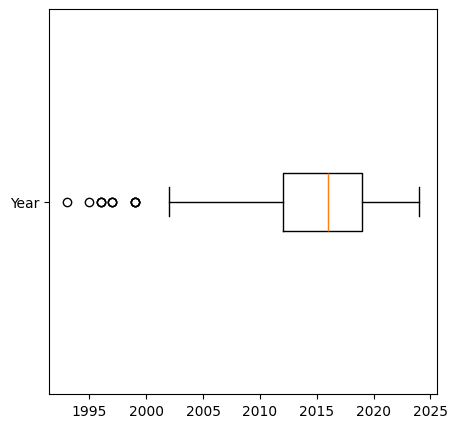

In [15]:
if setting_bag.show_books_by_year_box_plot:
    PlotManager().show_box_plot(df = books_df, x_name = "Year")


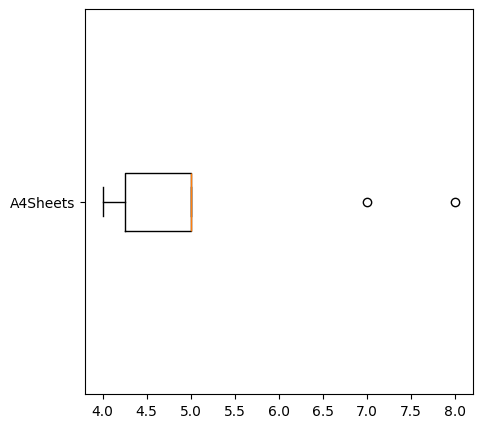

In [16]:
if setting_bag.show_reading_list_by_kbsize_box_plot:
    PlotManager().show_box_plot(df = rl_by_kbsize_df, x_name = "A4Sheets")


#### Main : Markdown Files

In [17]:
markdown_processor : MarkdownProcessor = MarkdownProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
markdown_processor.try_show_readme_md(rolling_total_df = rolling_total_df)

|   Years |   Books |   Pages | TotalSpend   | LastUpdate   |
|--------:|--------:|--------:|:-------------|:-------------|
|       9 |     301 |   82434 | $8498.52     | 2024-07-24   |



In [18]:
markdown_processor.try_show_and_save_reading_list_by_month_md(
    sas_by_month_tpl = sas_by_month_tpl, 
    sas_by_year_street_price_df = sas_by_year_street_price_df)

In [19]:
markdown_processor.try_show_and_save_reading_list_by_publisher_md(sas_by_publisher_tpl = sas_by_publisher_tpl)

In [20]:
markdown_processor.try_show_and_save_reading_list_by_rating_md(sas_by_rating_df = sas_by_rating_df)

In [21]:
markdown_processor.try_show_and_save_reading_list_by_topic_md(sas_by_topic_df = sas_by_topic_df)

In [22]:
markdown_processor.try_show_and_save_reading_list_topic_trend_md(yt_by_topic_df = yt_by_topic_df)

In [23]:
markdown_processor.try_show_and_save_reading_list_md(books_df = books_df)